In [2]:
!pip install mlrose-hiive
!pip install joblib===1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98333 sha256=f3ac9279ccfb0a92e62656c8454d46837d6be1c8ba871956ce2db997f7572e51
  Stored in directory: /root/.cache/pip/wheels/bc/e5/b1/de57d3595365eda00e4c8b37f65601da5c85c6afcf146423eb
Successfully built mlrose-hiive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import time
from mlrose_hiive.algorithms.decay import GeomDecay
import os
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report



In [5]:
#Read dataset
dataset = pd.read_csv("tic-tac-toe.csv")
dataset.head()

,id,'top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'
0,1,x,x,x,x,o,o,x,o,o,positive
1,2,x,x,x,x,o,o,o,x,o,positive
2,3,x,x,x,x,o,o,o,o,x,positive
3,4,x,x,x,x,o,o,o,b,b,positive
4,5,x,x,x,x,o,o,b,o,b,positive


In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
print(dataset.columns)
dataset['\'Class\''] = labelEncoder.fit_transform(dataset['\'Class\''])
dataset['\'Class\''].unique()

le = LabelEncoder()
for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])

X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values


Index(['id', ''top-left-square'', ''top-middle-square'', ''top-right-square'',
       ''middle-left-square'', ''middle-middle-square'',
       ''middle-right-square'', ''bottom-left-square'',
       ''bottom-middle-square'', ''bottom-right-square'', ''Class''],
      dtype='object')


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (766, 10)
Shape of y_train:  (766,)
shape of x_test:  (192, 10)
shape of y_test:  (192,)


In [8]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [10]:
#RHC

rhc_results_iterations = []
for i in range(1, 1000, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='random_hill_climb', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
        model.fit(scaled_X_train, y_train)
        y_train_pred = model.predict(scaled_X_train)
        y_train_accuracy = accuracy_score(y_train, y_train_pred)

        y_test_pred = model.predict(scaled_X_test)
        y_test_accuracy = accuracy_score(y_test, y_test_pred)

        f1score = f1_score(y_test, y_test_pred)

        rhc_results_iterations.append([i, "random_hill_climb", y_train_accuracy, y_test_accuracy, f1score])


df = pd.DataFrame(rhc_results_iterations, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])




<Axes: xlabel='Iterations', ylabel='Test Accuracy'>

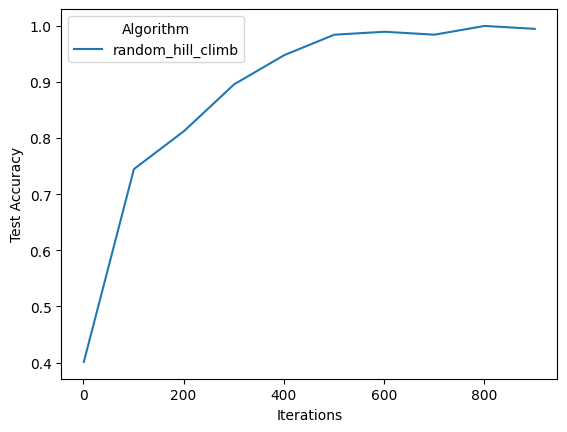

In [11]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", hue="Algorithm")


<Axes: xlabel='Iterations', ylabel='Train Accuracy'>

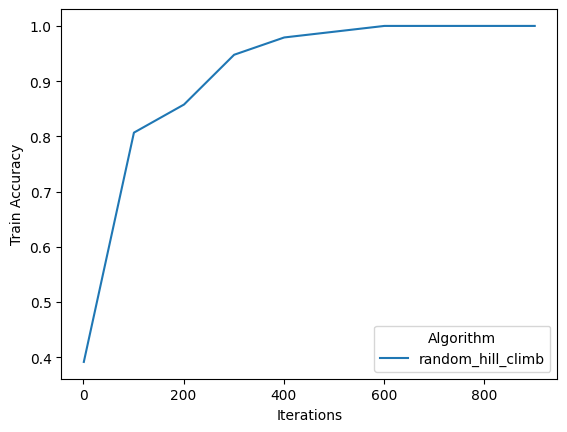

In [12]:
sns.lineplot(data=df, x="Iterations", y="Train Accuracy", hue="Algorithm")


In [13]:
max_iterations = 1000

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='random_hill_climb', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614,restarts=0)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at restart 0, and LR 0.1 -",y_train_accuracy)
print("Test accuracy at restart 0, and LR 0.1 -",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='random_hill_climb', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614,restarts=10)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at restart 10, LR 0.1 -",y_train_accuracy)
print("Test accuracy at restart 10,LR 0.1 -",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='random_hill_climb', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614,restarts=20)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at restart 20 and rate 0.1 -",y_train_accuracy)
print("Test accuracy at restart 20 and rate 0.1 -",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='random_hill_climb', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614,restarts=20)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at restart 20 with learning 0.75-",y_train_accuracy)
print("Test accuracy at restart 20 with learning rate 0.75-",y_test_accuracy)



Train accuracy at restart 0, and LR 0.1 - 0.9530026109660574
Test accuracy at restart 0, and LR 0.1 - 0.953125
Train accuracy at restart 10, LR 0.1 - 0.9347258485639687
Test accuracy at restart 10,LR 0.1 - 0.9270833333333334
Train accuracy at restart 20 and rate 0.1 - 0.9660574412532638
Test accuracy at restart 20 and rate 0.1 - 0.9739583333333334
Train accuracy at restart 20 with learning 0.75- 1.0
Test accuracy at restart 20 with learning rate 0.75- 1.0


In [14]:
#SA

sa_results_iterations = []
for i in range(1, 1000, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                        algorithm='simulated_annealing', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
        model.fit(scaled_X_train, y_train)
        y_train_pred = model.predict(scaled_X_train)
        y_train_accuracy = accuracy_score(y_train, y_train_pred)

        y_test_pred = model.predict(scaled_X_test)
        y_test_accuracy = accuracy_score(y_test, y_test_pred)

        f1score = f1_score(y_test, y_test_pred)

        sa_results_iterations.append([i, "simulated_annealing", y_train_accuracy, y_test_accuracy, f1score])


df = pd.DataFrame(sa_results_iterations, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])

<Axes: xlabel='Iterations', ylabel='Test Accuracy'>

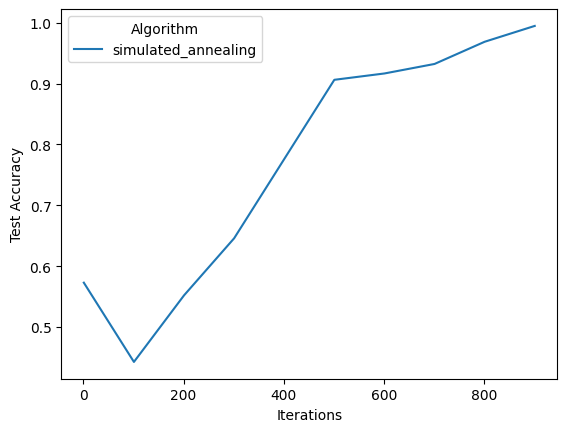

In [15]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", hue="Algorithm")


<Axes: xlabel='Iterations', ylabel='Train Accuracy'>

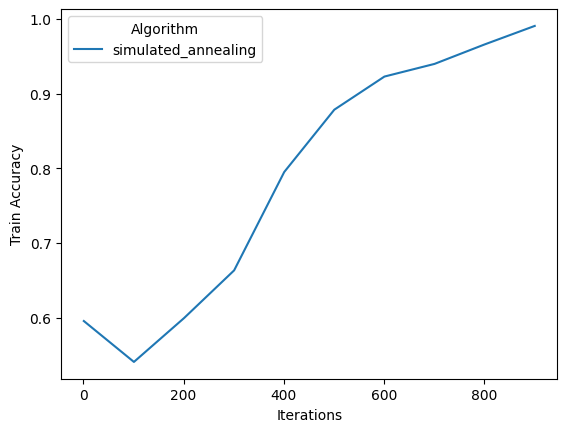

In [16]:
sns.lineplot(data=df, x="Iterations", y="Train Accuracy", hue="Algorithm")


In [17]:
max_iterations = 1000

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at 0.1 LR =",y_train_accuracy)
print("Test accuracy at 0.1 LR =",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.25,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at 0.25 LR =",y_train_accuracy)
print("Test accuracy at 0.25 LR =",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.5,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at 0.5 LR =",y_train_accuracy)
print("Test accuracy at 0.5 LR =",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at 0.75  LR =",y_train_accuracy)
print("Test accuracy at 0.75 LR =",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=max_iterations,
                                        bias=True, is_classifier=True, learning_rate=1.0,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

print("Train accuracy at 1.0 LR =",y_train_accuracy)
print("Test accuracy at 1.0 LR =",y_test_accuracy)


Train accuracy at 0.1 LR = 0.7963446475195822
Test accuracy at 0.1 LR = 0.796875
Train accuracy at 0.25 LR = 0.9778067885117493
Test accuracy at 0.25 LR = 0.9791666666666666
Train accuracy at 0.5 LR = 0.9556135770234987
Test accuracy at 0.5 LR = 0.9375
Train accuracy at 0.75  LR = 1.0
Test accuracy at 0.75 LR = 1.0
Train accuracy at 1.0 LR = 0.9947780678851175
Test accuracy at 1.0 LR = 0.984375


In [18]:
#GA

ga_results_iterations = []
for i in range(1, 1000, 100):
        print(i)
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='genetic_alg', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=614)
        model.fit(scaled_X_train, y_train)
        y_train_pred = model.predict(scaled_X_train)
        y_train_accuracy = accuracy_score(y_train, y_train_pred)

        y_test_pred = model.predict(scaled_X_test)
        y_test_accuracy = accuracy_score(y_test, y_test_pred)

        f1score = f1_score(y_test, y_test_pred)

        ga_results_iterations.append([i, "genetic_alg", y_train_accuracy, y_test_accuracy, f1score])


df = pd.DataFrame(sa_results_iterations, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])


1
101
201
301
401
501
601
701
801
901


In [21]:
i = 1000
model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='genetic_alg', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=1,
                                        random_state=614,pop_size =100,mutation_prob =0.1)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)
print("Train accuracy at pop size 100 and mutation prob 0.1 -",y_train_accuracy)
print("Test accuracy at pop size 100 and mutation prob 0.1 -",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='genetic_alg', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=1,
                                        random_state=614,pop_size =200,mutation_prob =0.2)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)
print("Train accuracy at pop size 200 with mutation 0.2 -",y_train_accuracy)
print("Test accuracy at pop size 200 with mutation 0.2 -",y_test_accuracy)

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='genetic_alg', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.75,
                                        early_stopping=True, clip_max=5, max_attempts=1,
                                        random_state=614,pop_size =100,mutation_prob =0.2)
model.fit(scaled_X_train, y_train)
y_train_pred = model.predict(scaled_X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)
print("Train accuracy at pop size 100 with mutation 0.2",y_train_accuracy)
print("Test accuracy at pop size 100 with mutation 0.2",y_test_accuracy)



Train accuracy at pop size 100 and mutation prob 0.1 - 0.7545691906005222
Test accuracy at pop size 100 and mutation prob 0.1 - 0.7864583333333334
Train accuracy at pop size 200 with mutation 0.2 - 0.7101827676240209
Test accuracy at pop size 200 with mutation 0.2 - 0.6927083333333334
Train accuracy at pop size 100 with mutation 0.2 0.6305483028720626
Test accuracy at pop size 100 with mutation 0.2 0.6041666666666666


In [24]:
times = []
import time
i =1000
model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm="random_hill_climb", max_iters=i,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=5)
start = time.time()
model.fit(scaled_X_train, y_train)
traintime = time.time()-start
start = time.time()
y_train_pred = model.predict(scaled_X_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)

times.append(['"random_hill_climb"', traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='simulated_annealing', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=5,
                                        random_state=614)
start = time.time()
model.fit(scaled_X_train, y_train)
traintime = time.time()-start
start = time.time()
y_train_pred = model.predict(scaled_X_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)
times.append(['simulated_annealing', traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm='genetic_alg', max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=5,
                                        random_state=614, pop_size=200, mutation_prob = 0.1)
start = time.time()
model.fit(scaled_X_train, y_train)
traintime = time.time()-start
start = time.time()
y_train_pred = model.predict(scaled_X_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

f1score = f1_score(y_test, y_test_pred)
times.append(['genetic_alg', traintime, y_test_accuracy, testime])
print(times)

df_times = pd.DataFrame(times, columns=["Algorithm", "Training Time", "Test Accuracy", "Testing Time"])


df_times.head()



[['"random_hill_climb"', 0.679602861404419, 0.3854166666666667, 0.0004999637603759766], ['simulated_annealing', 3.6776468753814697, 0.796875, 0.0003142356872558594], ['genetic_alg', 12.274170637130737, 0.9010416666666666, 0.0005452632904052734]]


,Algorithm,Training Time,Test Accuracy,Testing Time
0,"""random_hill_climb""",0.679603,0.385417,0.000500
1,simulated_annealing,3.677647,0.796875,0.000314
2,genetic_alg,12.274171,0.901042,0.000545


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Training Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Test Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Testing Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['index', 'Training Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['Training Time', 'Test Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['Test Accuracy', 'Testing Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'count()', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Training Time', 'count()', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Test Accuracy', 'count()', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Testing Time', 'count()', 'Algorithm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['Training Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Test Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Testing Time'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['index', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_17, *['Training Time', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_18, *['Test Accuracy', 'Algorithm'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_19, *['Testing Time', 'Algorithm'], **{'inner': 'stick'})
chart